# Testing Boullanger and Wood, 2022
- After email conversatoins with Hugh Oneill, the only way we can get Boulling and wood to match other studies is if the equatoin in their abstract has an incorrect term, e.g. the logso4 term should be logS


## Issues from email thread
- First issue is Cell N8 in their spreadsheet doesnt reference the Na2O content, instead has a constant value of 3 wt%. Confirmed that was an error by email
- First value of compositions - Table_3_data after eq. exp, get LogC^s = 9, Hugh Oneill gets 5.9 for log Cs6+
- In their supplement, they show that ONeill and BW2022 give very similar answers, I can only achieve this if I use temperature in celcius in Oneills equations, when it should be Kelvin. 
- Julien emailed back, confirming that they used temperature in celcius for ONeill as the supplement wasn't out yet. So their Cs6 values calculated for Hugh Oneill are wrong.
- Hugh says 'In terms of log CS6+ (in wt% S with fS2 & fO2, so as in their Eqn. 5),
the RMSD for B&W is 0.16, for ON&M is 0.22.
To convert ln CS6+(ON&M Eqn12a) to the log CS6+ used by B&W, see column BD.'

- So basically, the Log Cs6+ from Boulling and wood is not simply the log-ln conversion of Hugh ONeill. 
- Instead, what you have to do, is 
(ONeill lnC6+lnK)/ln10 - log(10,000)


## Equations they are using

Boulling and Wood 2022
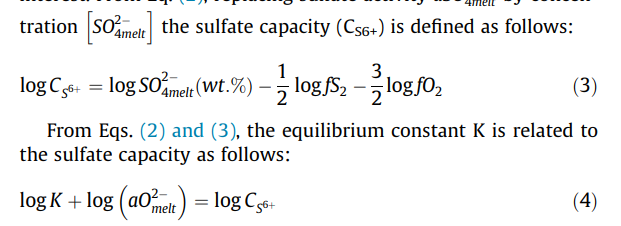

ONeill and Mavrogenes 2022, Where S is in ppm, and fSO3 is in bars
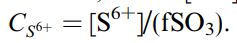



- So boillin and wood use 0.5 log fS2 +1.5 logfo2, 
- Hugh says these are equivalent, because  0.5 S2 + 1.5 O2 = SO3
- Obviously you have to use the appropriate one with the appropriate equation. They are related simply by log K for the gas reaction, the free energy of which we give in our Eqn. 6b
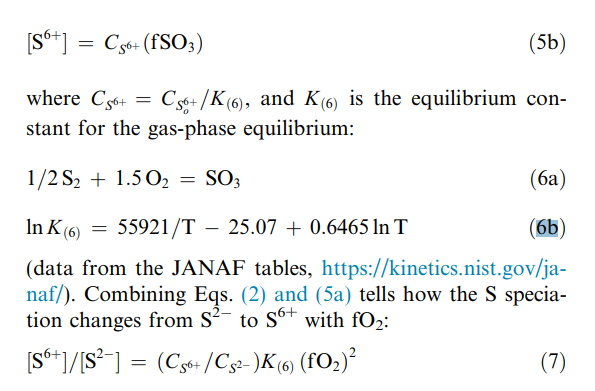


- So hugh converts between his lnC6+, which is on a ppm basis, and that of Boulling and Wood (2022), which is on a wt% basis. That is the log(10,000) term
- You also need a term for lnK, because that relates S2 and 1/2 O2
- And 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

In [4]:
# This is results from their provided calculator
Liqs_KnowFe=pd.read_excel('Boullanger_Wood_Supp_info.xlsx', 
                        sheet_name="PySulfSat_Input")

In [16]:
# This is their calibration data. 
Liqs_test=pd.read_excel('Boullanger_Wood_Supp_info.xlsx', 
            sheet_name="TestData")
Liqs_test=Liqs_test.fillna(0)

In [18]:
test1=ss.calculate_anhydrous_cat_fractions_liquid(liq_comps=Liqs_test)

In [ ]:
test1

In [ ]:
LnCS6_calc=(-8.02+(21100+44000*liqs['Na_Liq_cat_frac']+18700*liqs['Mg_Liq_cat_frac']
+4300*liqs['Al_Liq_cat_frac']+35600*liqs['Ca_Liq_cat_frac']
+44200*liqs['K_Liq_cat_frac']+16500*liqs['Fe2_Liq_cat_frac']+12600*liqs['Mn_Liq_cat_frac'])/T_K)

    
logCs6=(-12.659+(3692*liqs['Ca_Liq_cat_frac'] - 7592*liqs['Si_Liq_cat_frac']
        -13736*liqs['Ti_Liq_cat_frac']+3762*liqs['Al_Liq_cat_frac']+34483)/T_K)    

## Calculate it for ONeill

In [4]:
Calc_ONeill_noFe3=ss.calculate_OM2022_CS6(df=Liqs_test, 
                                    T_K=Liqs_test['Temparature (K)'],
                                   Fe3Fet_Liq=0)

In [5]:
Calc_ONeill_10Fe3=ss.calculate_OM2022_CS6(df=Liqs_test, 
                                    T_K=Liqs_test['Temparature (K)'],
                                   Fe3Fet_Liq=0.1)

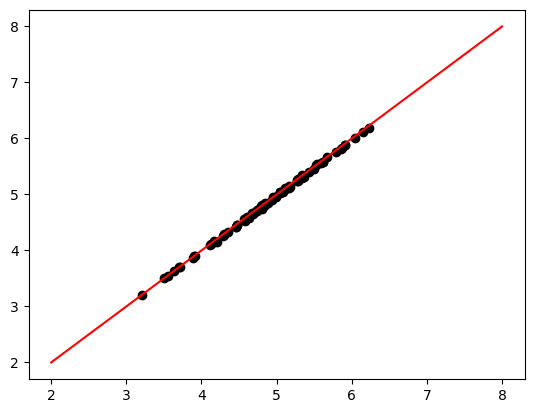

In [6]:
plt.plot(Calc_ONeill_noFe3['LogCS6_calc'],
         Calc_ONeill_10Fe3['LogCS6_calc'],
         'ok')
plt.plot([2, 8],[2, 8], '-r')

## Check with spreadsheet

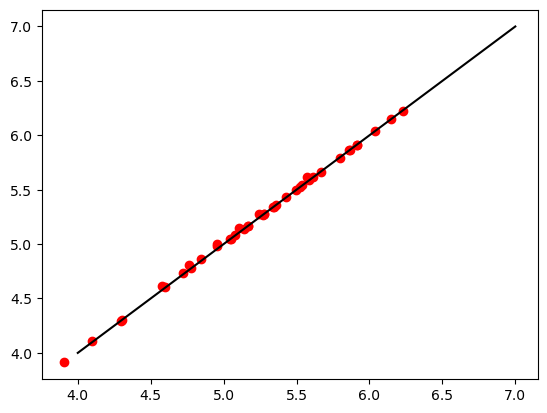

In [10]:
plt.plot(Liqs_test['PW_LogCS6'].loc[Liqs_test['PW_LogCS6']>0],
         Calc_ONeill_noFe3['LogCS6_calc'].loc[Liqs_test['PW_LogCS6']>0], 'or')
plt.plot([4, 7], [4, 7], '-k')

In [5]:
Calc_BW2022=ss.calculate_BW2022_CS6(df=Liqs_test, 
                                    T_K=Liqs_test['Temparature (K)'])

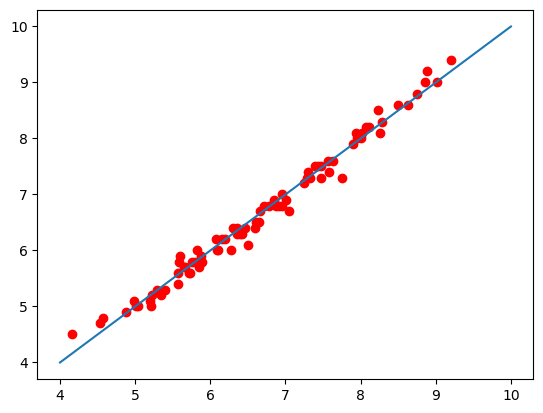

In [14]:
plt.plot(Calc_BW2022['LogCS6_calc'], 
         Liqs_test['Log Cs'], 'or')
plt.plot([4, 10], [4, 10])


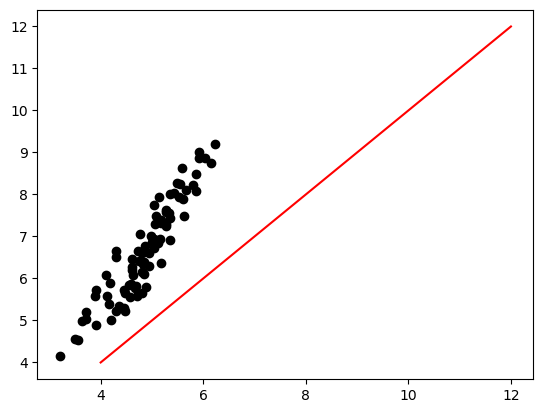

In [10]:
plt.plot(Calc_ONeill['LogCS6_calc'],
         Calc_BW2022['LogCS6_calc'],
         'ok')
plt.plot([4, 12],[4, 12], '-r')

In [34]:
calc_ONeillTest=ss.calculate_OM2022_S6St(df=Liqs_test, T_K=Liqs_test['Temparature (K)'],  
                    Fe3Fet_Liq=0.01)

calc_ONeillTest.head()
LogC6_ONeill=np.log10(np.exp(calc_ONeillTest['LnCS2_calc']))

In [35]:
Liqs_test

,Sample,Temparature (K),SiO2_Liq,Al2O3_Liq,MgO_Liq,CaO_Liq,FeOt_Liq,TiO2_Liq,K2O_Liq,Na2O_Liq,MnO_Liq,Log Cs,n
0,T-Basalt,1473,49.1,16.6,4.3,9.8,7.63,2.97,1.30,4.28,0.23,9.0,20 (EPMA)
1,NIB,1473,49.1,14.4,8.5,12.4,8.88,0.93,0.41,2.41,0.19,9.0,20 (EPMA)
2,Nephelinite,1473,43.2,14.3,7.9,14.4,8.73,2.93,0.49,2.58,2.51,9.4,20 (EPMA)
3,Basanite,1473,47.2,12.1,10.4,10.7,9.30,2.55,0.58,2.92,0.19,9.2,20 (EPMA)
4,T-Phonolite,1473,57.7,20.7,2.0,4.6,4.88,1.64,2.62,6.03,0.14,8.6,30 (EPMA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,SLC,1773,40.3,11.0,15.3,17.2,13.83,0.00,0.00,0.96,0.00,5.8,20 (EPMA)
78,Rhyolite,1773,74.8,15.1,0.3,0.9,1.14,0.32,4.10,3.52,0.00,4.5,5 (SIMS)
79,CMAS1,1773,48.4,16.9,12.0,22.2,0.00,0.00,0.00,1.23,0.00,5.8,30 (EPMA)
80,CMAS2,1773,45.6,19.0,17.3,17.7,0.00,0.00,0.00,1.12,0.00,5.7,30 (EPMA)


In [36]:
calc_GivenFe3=ss.calculate_OM2022_S6St(df=Liqs_KnowFe, T_K=Liqs_KnowFe['Temparature (K)'],  
                    Fe3Fet_Liq=0.3)

calc_GivenFe3.head()

,S6St_Liq,LnCS2_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,Temparature (K),1/T,SiO2_Liq,Al2O3_Liq,MgO_Liq,CaO_Liq,FeOt_Liq,TiO2_Liq,K2O_Liq,Na2O_Liq,MnO_Liq,Total,LogCs(calc),err logCs calc,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_Fe3,Mg_Number_Liq_NoFe3,logfo2_calc,Fe2_Liq_cat_frac,LnCS6_calc
0,0.999039,-4.388176,-17.614074,6.946560,2.642805,1473,0.000679,61.9,18.3,3.49,6.89,4.01,0.62,1.04,3.37,0,99.62,8.416224,0.154,0.665454,0.055932,0.000000,0.036052,0.079363,0.115932,0.035122,0.007132,0.005014,0.0,0.574565,0.048293,0.000000,0.031128,0.068524,0.200197,0.060649,0.012315,0.004329,0.0,0.608056,0.608056,-5.785037,0.021790,11.585388
1,0.999299,-3.780054,-17.614074,7.261878,2.523339,1473,0.000679,50.0,18.3,10.00,8.00,4.01,0.62,1.04,3.37,0,95.34,9.000724,0.154,0.543399,0.162016,0.000000,0.036446,0.093156,0.117200,0.035506,0.007210,0.005068,0.0,0.468482,0.139679,0.000000,0.031421,0.080313,0.202083,0.061221,0.012431,0.004370,0.0,0.816353,0.816353,-5.904503,0.021995,13.058992
2,0.996719,-6.753189,-26.120313,5.716383,2.523339,1200,0.000833,50.0,18.3,10.00,8.00,4.01,0.62,1.04,3.37,0,95.34,13.928311,0.154,0.543399,0.162016,0.000000,0.036446,0.093156,0.117200,0.035506,0.007210,0.005068,0.0,0.468482,0.139679,0.000000,0.031421,0.080313,0.202083,0.061221,0.012431,0.004370,0.0,0.816353,0.816353,-9.774271,0.021995,17.855062
3,0.996177,-6.529773,-26.120313,5.562768,2.534714,1200,0.000833,50.0,18.3,10.00,8.00,4.01,0.62,1.04,3.37,1,96.34,13.945338,0.154,0.538442,0.160538,0.009121,0.036114,0.092307,0.116131,0.035182,0.007144,0.005022,0.0,0.464793,0.138579,0.007874,0.031174,0.079681,0.200492,0.060739,0.012333,0.004335,0.0,0.816353,0.816353,-9.762895,0.021822,17.872477


## Boulanger and Wood 2022

In [37]:
def calc_BW2022_CS6(*, df, T_K):
    """ Calculates logCs6 and Cs6 using the expression of 
    Boulanger and Wood, 2022 """
    
    liqs=df.copy()
    liqs=ss.calculate_anhydrous_cat_fractions_liquid(liq_comps=liqs)
    
    logCs6=(-12.659+(3692*liqs['Ca_Liq_cat_frac'] - 7592*liqs['Si_Liq_cat_frac']
        -13736*liqs['Ti_Liq_cat_frac']+3762*liqs['Al_Liq_cat_frac']+34483)/T_K)
    

  
    liqs.insert(0, 'LogCS6_calc', logCs6)
    liqs.insert(0, 'LnCS6_calc', np.log(10**logCs6))
    liqs.insert(0, 'CS6_calc', 10**(LnCS6_calc))
    return liqs                

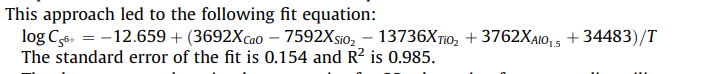

In [14]:
T_K

0    1473
1    1473
2    1200
3    1200
Name: Temparature (K), dtype: int64

In [15]:
T_K=Liqs_KnowFe['Temparature (K)']
logCs6=(-12.659+(3692*liqs['Ca_Liq_cat_frac'] - 7592*liqs['Si_Liq_cat_frac']
        -13736*liqs['Ti_Liq_cat_frac']+3762*liqs['Al_Liq_cat_frac']+34483)/T_K)

In [16]:
logCs6

0     8.432356
1     9.013111
2    13.943516
3    13.960313
dtype: float64

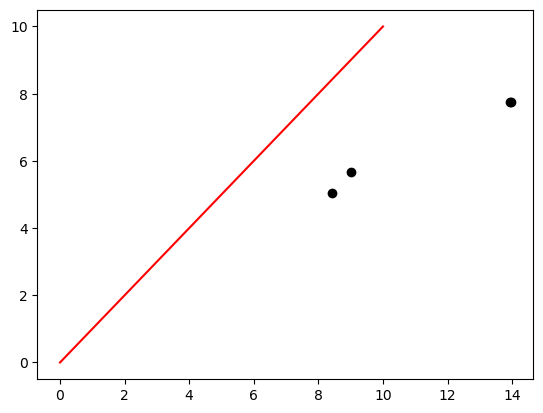

In [22]:
plt.plot(np.log10(10**logCs6), np.log10(np.exp(calc_GivenFe3['LnCS6_calc'])), 'ok')
plt.plot([0, 10], [0, 10], '-r')